In [4]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('/Users/jayhee/Downloads/comments_2000.csv')

In [20]:
df['comments'].describe()

count                                                  2000
unique                                                 2000
top       ['Not just her. Mike Rounds and Kevin Cramer I...
freq                                                      1
Name: comments, dtype: object

In [24]:
df['label'] = ['Democrats'] * 1000 + ['Republicans'] * 1000

In [28]:
# Check the type of each entry in the 'comments' column
non_string_entries = df[~df['comments'].apply(lambda x: isinstance(x, str))]

print(non_string_entries)

Empty DataFrame
Columns: [id, comments, label]
Index: []


In [30]:
# Convert lists or other iterable entries into a single string
df['comments'] = df['comments'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else x
)


In [32]:
print(df)

           id                                           comments        label
0     1gxpeav  ['Not just her. Mike Rounds and Kevin Cramer I...    Democrats
1     1gxgra8  ['Still hard to believe', 'I feel your pain. I...    Democrats
2     1gxd8ay  ['Translation - rumors were true and suppresse...    Democrats
3     1gwtt2i  ['We need to repurpose "DEI". One suggestion.....    Democrats
4     1gwtdqn  ['Hahahahaha all that tap dancing from him and...    Democrats
...       ...                                                ...          ...
1995  187ix87  ["/r/Republican is a partisan subreddit.  This...  Republicans
1996  187472x  ["/r/Republican is a partisan subreddit.  This...  Republicans
1997  1863tdd  ["/r/Republican is a partisan subreddit.  This...  Republicans
1998  184gtav  ["/r/Republican is a partisan subreddit.  This...  Republicans
1999  182ymxi  ["/r/Republican is a partisan subreddit.  This...  Republicans

[2000 rows x 3 columns]


There are multiple comments in one datapoint, so we should explode the comments.

In [34]:
import ast

# Convert the 'comments' column from string to list
df['comments'] = df['comments'].apply(ast.literal_eval)

# Explode the 'comments' column to separate each text into its own row
df_exploded = df.explode('comments').reset_index(drop=True)

print(df_exploded)

             id                                           comments  \
0       1gxpeav  Not just her. Mike Rounds and Kevin Cramer I b...   
1       1gxpeav  Can’t Biden just order the FBI to conduct a ba...   
2       1gxpeav  The Republicans don't need her vote, though. T...   
3       1gxpeav       Eh. The bar gets lower by the day I suppose.   
4       1gxpeav  Don’t worry everybody, Susan Collins will expr...   
...         ...                                                ...   
226478  182ymxi  The perpetrators werre one race, and the victi...   
226479  182ymxi  Is he a super progressive prosecutor or someth...   
226480  182ymxi  >Is he a super progressive prosecutor or somet...   
226481  182ymxi  Ah, I see. So in CA, the lying in wait is a sp...   
226482  182ymxi  Yeah, I worked in Mississippi an Tennessee, an...   

              label  
0         Democrats  
1         Democrats  
2         Democrats  
3         Democrats  
4         Democrats  
...             ...  
22647

In [40]:
# Ensure all values in 'comments' column are strings and handle NaN values
df_exploded['comments'] = df_exploded['comments'].fillna('').astype(str)

# List of phrases to check
phrases_to_remove = [
    "**Join:**\n\n* /r/KamalaHarris\n\n*",
    "**Take action:",
    "/r/Republican is a partisan subreddit."
]

# Filter out rows where 'comments' start with any of the specified phrases
df_filtered = df_exploded[~df_exploded['comments'].str.startswith(tuple(phrases_to_remove))].reset_index(drop=True)

print(df_filtered)


             id                                           comments  \
0       1gxpeav  Not just her. Mike Rounds and Kevin Cramer I b...   
1       1gxpeav  Can’t Biden just order the FBI to conduct a ba...   
2       1gxpeav  The Republicans don't need her vote, though. T...   
3       1gxpeav       Eh. The bar gets lower by the day I suppose.   
4       1gxpeav  Don’t worry everybody, Susan Collins will expr...   
...         ...                                                ...   
225088  182ymxi  The perpetrators werre one race, and the victi...   
225089  182ymxi  Is he a super progressive prosecutor or someth...   
225090  182ymxi  >Is he a super progressive prosecutor or somet...   
225091  182ymxi  Ah, I see. So in CA, the lying in wait is a sp...   
225092  182ymxi  Yeah, I worked in Mississippi an Tennessee, an...   

              label  
0         Democrats  
1         Democrats  
2         Democrats  
3         Democrats  
4         Democrats  
...             ...  
22508

In [ ]:
# Calculate the percentage of each label
label_distribution = df_filtered['label'].value_counts(normalize=True) * 100

# Print the percentages
print(label_distribution)

# Plot a pie chart
plt.figure(figsize=(4, 4))
label_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Percentage of Labels')
plt.ylabel('')  # Remove y-label for clarity
plt.show()

In [47]:
# Step 1: Remove redundant and too-short comments
df_filtered = df_filtered[df_filtered['comments'].str.len() >= 20]  # Keep only comments with 20+ characters

# Step 2: Count the number of Republican comments
num_republicans = df_filtered[df_filtered['label'] == 'Republicans'].shape[0]

print(f"Number of Republican comments: {num_republicans}")

# Step 3: Randomly sample the same number of Democrat comments
df_democrats_sampled = df_filtered[df_filtered['label'] == 'Democrats'].sample(n=num_republicans, random_state=42)

# Step 4: Combine the sampled Democrats and Republicans
df_balanced = pd.concat([df_democrats_sampled, df_filtered[df_filtered['label'] == 'Republicans']])

# Step 5: Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the balance
print(df_balanced['label'].value_counts())

# Save the balanced dataset if needed
# df_balanced.to_csv('balanced_dataset.csv', index=False)


Number of Republican comments: 51340
label
Republicans    51340
Democrats      51340
Name: count, dtype: int64


label
Republicans    50.0
Democrats      50.0
Name: proportion, dtype: float64


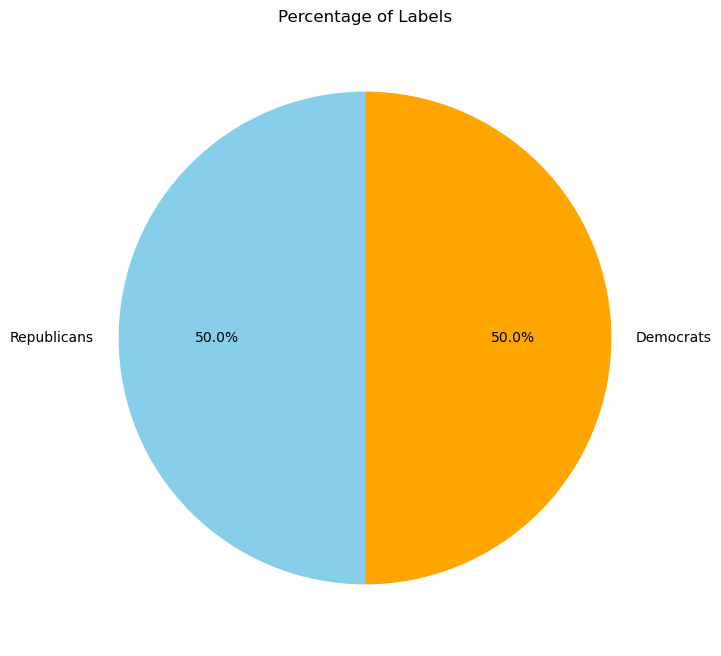

In [51]:
# Calculate the percentage of each label
label_distribution = df_balanced['label'].value_counts(normalize=True) * 100

# Print the percentages
print(label_distribution)
# Plot a pie chart
plt.figure(figsize=(8, 8))
label_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Percentage of Labels')
plt.ylabel('')  # Remove y-label for clarity
plt.show()

In [53]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


sentiment
Positive    38.398909
Negative    36.439423
Neutral     25.161667
Name: proportion, dtype: float64


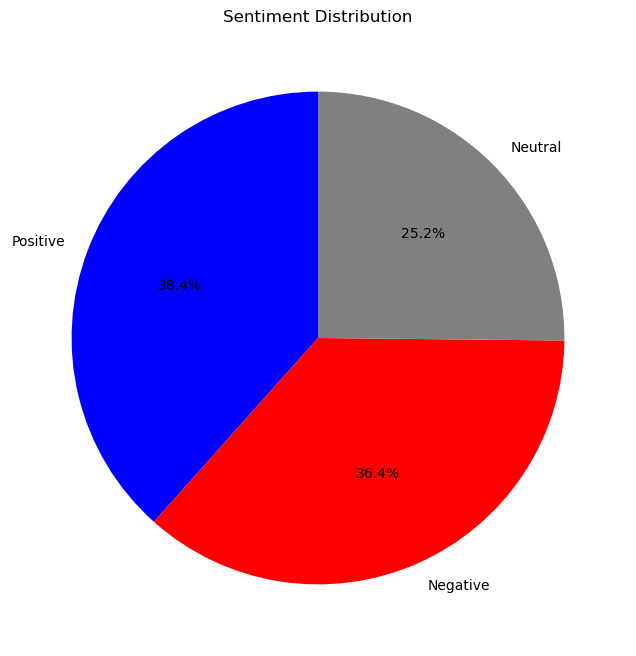

In [65]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify sentiments
def classify_sentiment(comment):
    score = analyzer.polarity_scores(comment)['compound']
    if score >= 0.2:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the comments
df_balanced['sentiment'] = df_balanced['comments'].apply(classify_sentiment)

# Check the distribution of sentiments
sentiment_distribution = df_balanced['sentiment'].value_counts(normalize=True) * 100
print(sentiment_distribution)

# Plot the sentiment distribution
plt.figure(figsize=(8, 8))
sentiment_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.ylabel('')  # Remove y-label for clarity
plt.show()


In [63]:
df_balanced

,id,comments,label
0,1gooevo,'I don't want to be a conspiracy theorist but ...,Republicans
1,1gfjf1b,What's the problem? It's a factually correct s...,Democrats
2,1f9847v,> Who is the real rino?\n\nThe person who endo...,Republicans
3,1er9uky,"First, tips are already subject to federal inc...",Republicans
4,1evfhkx,Reestablish the constitutional systems of chec...,Democrats
...,...,...,...
102675,1eejhzd,I would vote for a pile of dog shit over trump...,Democrats
102676,1gpo9d3,I had to join Planet Fitness because it’s lite...,Republicans
102677,1fdpzen,Jesus Christ. There was no stealing the vote. ...,Republicans
102678,1fhf4ub,I think it was Tom Arnold who told a joke abou...,Democrats


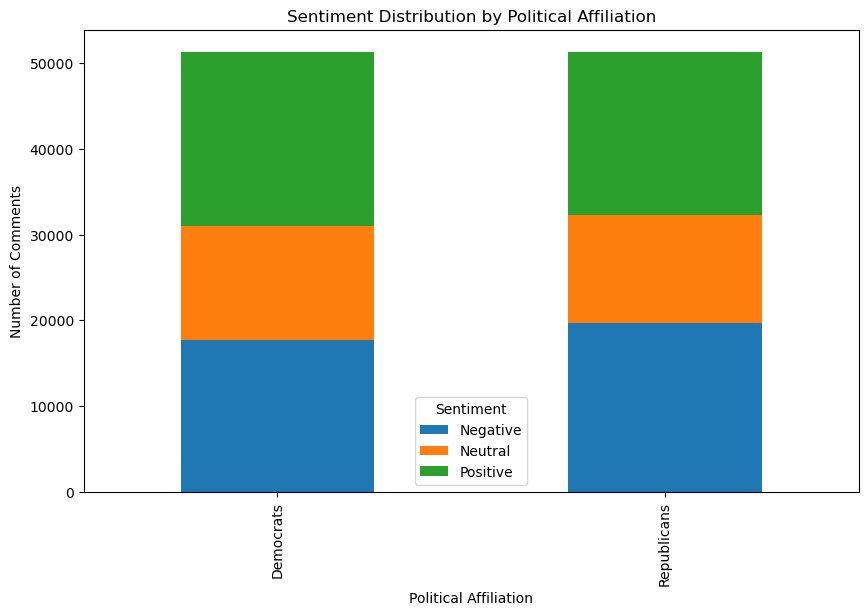

In [67]:
import matplotlib.pyplot as plt

sentiment_by_label = df_balanced.groupby(['label', 'sentiment']).size().unstack()

sentiment_by_label.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Political Affiliation')
plt.ylabel('Number of Comments')
plt.xlabel('Political Affiliation')
plt.legend(title='Sentiment')
plt.show()


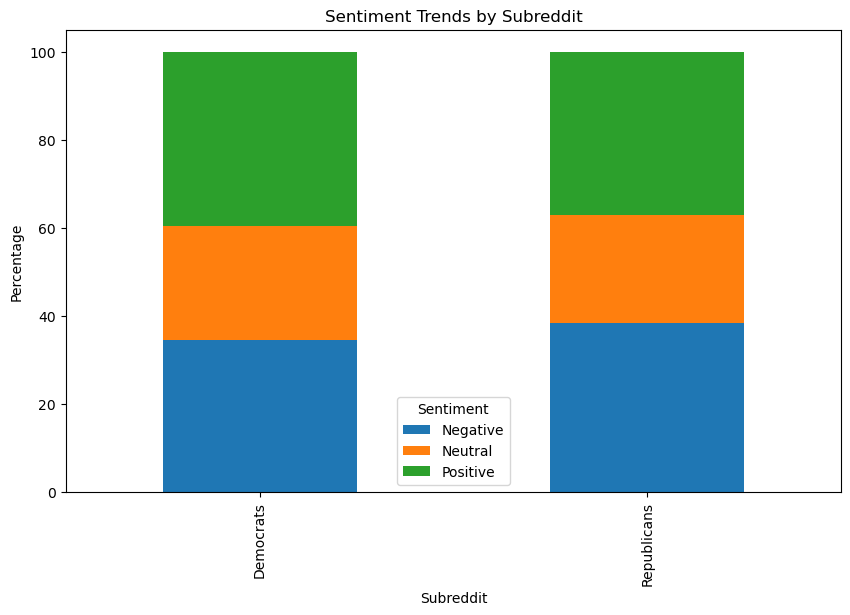

In [73]:
sentiment_scores = df_balanced.groupby('label')['comments'].apply(
    lambda x: x.apply(lambda comment: analyzer.polarity_scores(comment)['compound']).mean()
)
print(sentiment_scores)


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Convert comments to numeric features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df_balanced['comments'])
y = df_balanced['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6874269575379821

Classification Report:
               precision    recall  f1-score   support

   Democrats       0.68      0.70      0.69     10296
 Republicans       0.69      0.67      0.68     10240

    accuracy                           0.69     20536
   macro avg       0.69      0.69      0.69     20536
weighted avg       0.69      0.69      0.69     20536



In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200]
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy', verbose=1)
grid_search_lr.fit(X_train, y_train)

# Best Logistic Regression model
best_lr = grid_search_lr.best_estimator_
lr_accuracy = grid_search_lr.best_score_
print("Logistic Regression Best Parameters:", grid_search_lr.best_params_)
print("Logistic Regression Accuracy:", lr_accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Logistic Regression Best Parameters: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.6831417792742774


In [84]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}
# Measure start time
start_time = time.time()

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)


# Measure end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Best Random Forest model
best_rf = grid_search_rf.best_estimator_
rf_accuracy = grid_search_rf.best_score_
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Accuracy:", rf_accuracy)
print(f"Time taken for RF Grid Search: {elapsed_time:.2f} seconds")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Random Forest Accuracy: 0.6456588149347163
Time taken for SVM Grid Search: 965.75 seconds


In [96]:
# Evaluate Random Forest on test set
rf_test_predictions = best_rf.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print("Random Forest Test Accuracy:", rf_test_accuracy)

Random Forest Test Accuracy: 0.6421406310868718


In [94]:
# Train the Logistic Regression model with the best hyperparameters on the training set
best_model = grid_search_lr.best_estimator_

# Use the trained model to make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance on the test set
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)


Test Accuracy with Best Hyperparameters: 0.6866478379431242


### **Motivation for Using Deep Learning**

In the initial stages, traditional machine learning models such as Logistic Regression and Random Forest were implemented for classifying comments into Republican and Democrat categories. While these models provided baseline performance, their results were not satisfactory due to the complex and nuanced nature of textual data, which often requires capturing sequential dependencies and contextual relationships between words. As such, I decided to explore deep learning techniques to improve classification performance.

---

### **Overview of the Deep Learning Approach**

To address the limitations of traditional models, I implemented a deep learning model leveraging the TensorFlow library. The architecture was designed to capture the sequential nature of text data and make better predictions by learning word relationships and context. Here’s a brief summary of the process:

1. **Data Preprocessing**:
   - The comments were tokenized and converted into sequences of integers using TensorFlow's `Tokenizer`.
   - These sequences were padded to ensure uniform input size for the model.

2. **Model Architecture**:
   - **Embedding Layer**: Maps each word in the vocabulary to a dense vector representation, capturing semantic similarities between words.
   - **Bidirectional LSTM Layer**: A recurrent neural network layer that processes the input sequence in both forward and backward directions, enabling the model to learn long-term dependencies and context effectively.
   - **Dropout Layers**: Added to reduce overfitting by randomly deactivating a fraction of neurons during training.
   - **Fully Connected Dense Layers**: These layers process the features extracted by the LSTM and make the final prediction.
   - **Output Layer**: A single neuron with a sigmoid activation function was used for binary classification (Republicans vs. Democrats).

3. **Model Compilation and Training**:
   - The model was compiled using the Adam optimizer and binary cross-entropy loss, which are well-suited for binary classification tasks.
   - Training was performed on the processed dataset with a validation split to monitor the model’s performance during training.

By implementing this architecture, the model aims to capture the contextual relationships within the text, offering a significant improvement over traditional machine learning models in handling the complexity of political comments.


In [98]:
# Analyze comment lengths
df_balanced['length'] = df_balanced['comments'].apply(lambda x: len(x.split()))
df_balanced['length'].describe()


count    102680.000000
mean         31.914618
std          45.498186
min           1.000000
25%          10.000000
50%          19.000000
75%          36.000000
max        1611.000000
Name: length, dtype: float64

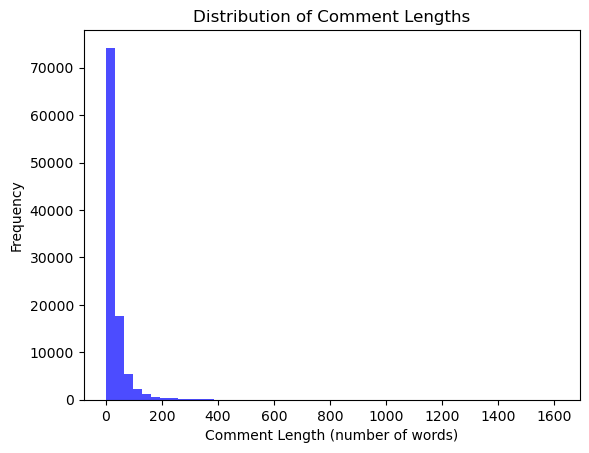

In [100]:
import matplotlib.pyplot as plt

plt.hist(df_balanced['length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length (number of words)')
plt.ylabel('Frequency')
plt.show()


In [102]:
# Set maximum length to the 90th percentile
max_sequence_length = int(df_balanced['length'].quantile(0.9))
print(f"Chosen max sequence length: {max_sequence_length}")


Chosen max sequence length: 68


In [104]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and truncate sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_balanced['comments'])
sequences = tokenizer.texts_to_sequences(df_balanced['comments'])

# Pad and truncate to max_sequence_length
max_sequence_length = 68
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')


In [107]:
# Check the class distribution
class_distribution = df_balanced['label'].value_counts(normalize=True)
print(class_distribution)


label
Republicans    0.5
Democrats      0.5
Name: proportion, dtype: float64


### Split the Data
We need to split the "padded_sequences" (input features) and labels into training and testing datasets.

In [109]:
# Encode labels: Republicans = 0, Democrats = 1
label_map = {'Republicans': 0, 'Democrats': 1}
labels = df_balanced['label'].map(label_map).values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

# Convert to NumPy arrays (required for TensorFlow)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Build a TensorFlow Model
Now, build a deep learning model. We'll use an Embedding layer and a Bidirectional LSTM for text classification.

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

# Define model parameters
vocab_size = 10000  # Vocabulary size
embedding_dim = 64  # Embedding dimension
max_length = 68     # Max sequence length (chosen earlier)

# Build the model
model = Sequential([
    Embedding(vocab_size, embedding_dim),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Train the Model
Train the model on the training dataset. Use a validation split to monitor overfitting.

In [116]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,  # Start with 5 epochs
    batch_size=32,
    verbose=1
)


Epoch 1/5
2054/2054 ━━━━━━━━━━━━━━━━━━━━ 135s 64ms/step - accuracy: 0.5094 - loss: 0.6921 - val_accuracy: 0.5460 - val_loss: 0.6892
Epoch 2/5
2054/2054 ━━━━━━━━━━━━━━━━━━━━ 135s 66ms/step - accuracy: 0.5627 - loss: 0.6825 - val_accuracy: 0.6373 - val_loss: 0.6455
Epoch 3/5
2054/2054 ━━━━━━━━━━━━━━━━━━━━ 133s 65ms/step - accuracy: 0.6697 - loss: 0.6118 - val_accuracy: 0.6823 - val_loss: 0.5861
Epoch 4/5
2054/2054 ━━━━━━━━━━━━━━━━━━━━ 133s 65ms/step - accuracy: 0.7360 - loss: 0.5256 - val_accuracy: 0.6909 - val_loss: 0.5746
Epoch 5/5
2054/2054 ━━━━━━━━━━━━━━━━━━━━ 132s 64ms/step - accuracy: 0.7617 - loss: 0.4833 - val_accuracy: 0.6949 - val_loss: 0.5855


### Evaluate the Model
Once trained, evaluate the model on the test set.

In [123]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

642/642 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6909 - loss: 0.5936
Test Accuracy: 0.692345142364502


### Make Predictions
You can now make predictions on unseen data or the test set.

In [124]:
# Predict the labels
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# Compare predictions to ground truth
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes, target_names=['Republicans', 'Democrats']))


642/642 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step
              precision    recall  f1-score   support

 Republicans       0.71      0.65      0.68     10240
   Democrats       0.68      0.74      0.71     10296

    accuracy                           0.69     20536
   macro avg       0.69      0.69      0.69     20536
weighted avg       0.69      0.69      0.69     20536



### **Assessment of Results**

#### **Key Metrics**
- **Precision**:
  - Republicans: **0.71**
  - Democrats: **0.68**
  - Indicates that predictions for Republicans are more accurate (fewer false positives).

- **Recall**:
  - Republicans: **0.65**
  - Democrats: **0.74**
  - Suggests that Democrats are easier to classify in terms of identifying all relevant instances (fewer false negatives).

- **F1-Score**:
  - Republicans: **0.68**
  - Democrats: **0.71**
  - Shows slightly better overall performance for Democrats.

- **Accuracy**:
  - **0.69** overall.
  - This indicates that while the model is doing reasonably well, there is room for improvement, especially given the balanced dataset.

---

#### **Key Observations**
1. **Democrats are easier to classify**:
   - Higher recall for Democrats (0.74) suggests the model is better at identifying Democrat comments compared to Republicans.

2. **Room for improvement**:
   - The overall accuracy and F1-scores indicate that the model can be enhanced further, potentially by using techniques like hyperparameter tuning, adding more features, or leveraging pretrained embeddings.

3. **Model Bias**:
   - The disparity in recall and precision between the two classes suggests that Democrats’ comments may have more distinctive patterns or linguistic features that the model is capturing.


In [134]:
# Custom comments
custom_comments = [
    "I strongly believe in equal rights and social justice.",
    "Taxes are too high, and the government is inefficient.",
    "We need to focus on climate change before it's too late.",
    "Trump is the worst human being in the world."
]

# Preprocess custom comments
custom_sequences = tokenizer.texts_to_sequences(custom_comments)
custom_padded = pad_sequences(custom_sequences, maxlen=max_sequence_length, padding='post')

# Predict labels
custom_predictions = model.predict(custom_padded)
custom_classes = (custom_predictions > 0.5).astype(int)

# Map predicted labels back to text
label_map_reverse = {0: 'Republicans', 1: 'Democrats'}
predicted_labels = [label_map_reverse[label] for label in custom_classes.flatten()]

# Print results
for comment, label in zip(custom_comments, predicted_labels):
    print(f"Comment: {comment}\nPredicted Label: {label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Comment: I strongly believe in equal rights and social justice.
Predicted Label: Democrats

Comment: Taxes are too high, and the government is inefficient.
Predicted Label: Republicans

Comment: We need to focus on climate change before it's too late.
Predicted Label: Democrats

Comment: Trump is the worst human being in the world.
Predicted Label: Democrats

